# Лабораторная работа №1

## Фильтр Блума

In [129]:
from bitarray import bitarray

class BloomFilter(object):

    def __init__(self, size, number_hash_functions):
        self.size = size
        self.number_hash_functions = number_hash_functions

        self.bloom_filter = bitarray(self.size)
        self.bloom_filter.setall(0)
    
    def __hash_djb2(self, s):
        hash = 5381
        for x in s:
            hash = ((hash << 5) + hash) + ord(x)
        return hash % self.size
    
    def __hash(self, item, K):
        return self.__hash_djb2(str(K) + item)

    def add_to_filter(self, item):
        for i in range(self.number_hash_functions):
            self.bloom_filter[self.__hash(item, i)] = 1

    def check(self, item):
        for i in range(self.number_hash_functions):
            if self.bloom_filter[self.__hash(item, i)] == 0:
                return True
        return False

    def union(self, other):
        if self.size != other.size or self.number_hash_functions != other.number_hash_functions:
            raise ValueError("Фильтры должны иметь одинаковый размер и количество хэш функций")
        new_filter = BloomFilter(self.size, self.number_hash_functions)
        new_filter.bloom_filter = self.bloom_filter | other.bloom_filter
        return new_filter

    def intersection(self, other):
        if self.size != other.size or self.number_hash_functions != other.number_hash_functions:
            raise ValueError("Фильтры должны иметь одинаковый размер и количество хэш функций")
        new_filter = BloomFilter(self.size, self.number_hash_functions)
        new_filter.bloom_filter = self.bloom_filter & other.bloom_filter
        return new_filter 

### Нахождение процента ложноположительных срабатываний

In [130]:
def generate_test_sample(n):
    data_to_add = [f"item_{i}" for i in range(n)]
    data_to_check = [f"item_{i}" for i in range(n//2, n+n//2)]
    return data_to_add, data_to_check

In [131]:
def test(m, k, data_to_add, data_to_check):
    bf = BloomFilter(m, k)

    for item in data_to_add:
        bf.add_to_filter(item)

    false_positives = 0
    for item in data_to_check:
        if not bf.check(item) and item not in data_to_add:
            false_positives += 1

    false_positive_rate = (false_positives / (m//2)) * 100
    print(f"Процент ложноположительных срабатываний: {false_positive_rate}%")
    return false_positive_rate

In [132]:
data_to_add, data_to_check = generate_test_sample(1000)

k = 2

In [133]:
test(10000, k, data_to_add, data_to_check)

Процент ложноположительных срабатываний: 0.4%


0.4

### Нахождение зависимости между m и k

In [134]:
m_values = [1000, 2000, 5000, 10000, 12000, 15000]
k_values = [1, 2, 3, 5, 7, 10]
results = []

In [135]:
for m in m_values:
    for k in k_values:
        results.append((m, k, test(m, k, *generate_test_sample(1000))))

Процент ложноположительных срабатываний: 68.8%
Процент ложноположительных срабатываний: 88.2%
Процент ложноположительных срабатываний: 100.0%
Процент ложноположительных срабатываний: 100.0%
Процент ложноположительных срабатываний: 100.0%
Процент ложноположительных срабатываний: 100.0%
Процент ложноположительных срабатываний: 18.099999999999998%
Процент ложноположительных срабатываний: 15.8%
Процент ложноположительных срабатываний: 20.3%
Процент ложноположительных срабатываний: 47.8%
Процент ложноположительных срабатываний: 50.0%
Процент ложноположительных срабатываний: 50.0%
Процент ложноположительных срабатываний: 0.64%
Процент ложноположительных срабатываний: 1.3599999999999999%
Процент ложноположительных срабатываний: 6.64%
Процент ложноположительных срабатываний: 12.16%
Процент ложноположительных срабатываний: 11.360000000000001%
Процент ложноположительных срабатываний: 14.16%
Процент ложноположительных срабатываний: 0.0%
Процент ложноположительных срабатываний: 0.4%
Процент ложноп

m	k	False Positive Rate (%)
1000	1	68.80
1000	2	88.20
1000	3	100.00
1000	5	100.00
1000	7	100.00
1000	10	100.00
2000	1	18.10
2000	2	15.80
2000	3	20.30
2000	5	47.80
2000	7	50.00
2000	10	50.00
5000	1	0.64
5000	2	1.36
5000	3	6.64
5000	5	12.16
5000	7	11.36
5000	10	14.16
10000	1	0.00
10000	2	0.40
10000	3	0.00
10000	5	0.42
10000	7	0.02
10000	10	0.00
12000	1	0.93
12000	2	0.00
12000	3	0.00
12000	5	0.00
12000	7	0.00
12000	10	0.00
15000	1	0.00
15000	2	0.00
15000	3	0.00
15000	5	0.00
15000	7	0.00
15000	10	0.00


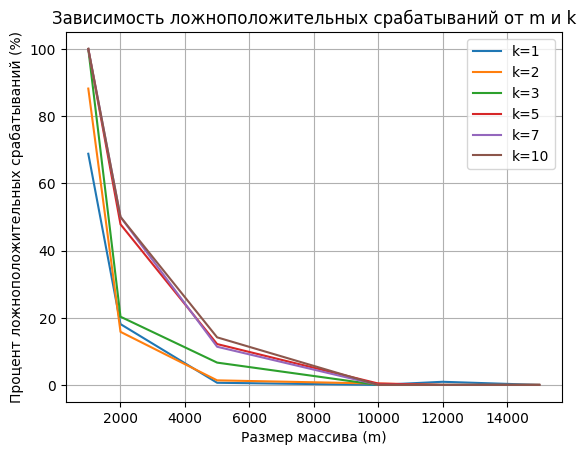

In [136]:
import matplotlib.pyplot as plt

print("m\tk\tFalse Positive Rate (%)")
for result in results:
    print(f"{result[0]}\t{result[1]}\t{result[2]:.2f}")

for k in k_values:
    m_list = [result[0] for result in results if result[1] == k]
    fp_rate_list = [result[2] for result in results if result[1] == k]
    plt.plot(m_list, fp_rate_list, label=f'k={k}')

plt.xlabel('Размер массива (m)')
plt.ylabel('Процент ложноположительных срабатываний (%)')
plt.title('Зависимость ложноположительных срабатываний от m и k')
plt.legend()
plt.grid(True)
plt.show()

### Многофакторный дисперсионный анализ

In [137]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Пример данных
data = pd.DataFrame({
    'm': [x[0] for x in results],
    'k': [x[1] for x in results],
    'false_positives':[x[2] for x in results]
})

# Многофакторный дисперсионный анализ
model = ols('false_positives ~ C(m) + C(k)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq    df           F        PR(>F)
C(m)      40772.251832   5.0  130.161764  4.596072e-17
C(k)        878.936365   5.0    2.805926  3.815578e-02
Residual   1566.214627  25.0         NaN           NaN


### Реализация операций пересечения и объединения фильтров Блума

In [138]:
bf1 = BloomFilter(10, 1)
bf2 = BloomFilter(10, 1)

sample1 = [1, 2, 3]
sample2 = [2, 3, 4]

for x in sample1:
    bf1.add_to_filter(f"item_{x}")

for x in sample2:
    bf2.add_to_filter(f"item_{x}")

bf1.bloom_filter, bf2.bloom_filter

(bitarray('0011100000'), bitarray('0001110000'))

In [139]:
bf1.union(bf2).bloom_filter

bitarray('0011110000')

In [140]:
bf1.intersection(bf2).bloom_filter

bitarray('0001100000')

## Фильтр Блума со счетом

In [1]:
import mmh3

class CountingBloomFilter:
    def __init__(self, size, hash_count):
        self.size = size
        self.hash_count = hash_count
        self.counters = [0] * size

    def add(self, item):
        for seed in range(self.hash_count):
            index = mmh3.hash(item, seed) % self.size
            self.counters[index] += 1

    def remove(self, item):
        for seed in range(self.hash_count):
            index = mmh3.hash(item, seed) % self.size
            if self.counters[index] > 0:
                self.counters[index] -= 1

    def check(self, item):
        for seed in range(self.hash_count):
            index = mmh3.hash(item, seed) % self.size
            if self.counters[index] == 0:
                return False
        return True

In [4]:
import random

size = 1000  
hash_count = 3  
n = 200  
test_elements = 1000  

cbf = CountingBloomFilter(size, hash_count)

added_elements = set()
for _ in range(n):
    element = str(random.randint(0, 1000000))
    added_elements.add(element)
    cbf.add(element)

false_positives = 0
for _ in range(test_elements):
    element = str(random.randint(1000001, 2000000))  
    if cbf.check(element):
        false_positives += 1

false_positive_rate = (false_positives / test_elements) * 100
print(f"Процент ложноположительных срабатываний: {false_positive_rate:.2f}%")

Процент ложноположительных срабатываний: 10.80%
